In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
df = pd.read_csv('Housing_Price/train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#Null Value Columns
nullseries= df.isna().sum()
print(nullseries[nullseries > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


## **Train Test Spliting & Drop Outliers & EDA**

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split the dataset into 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Text(0, 0.5, 'Frequency')

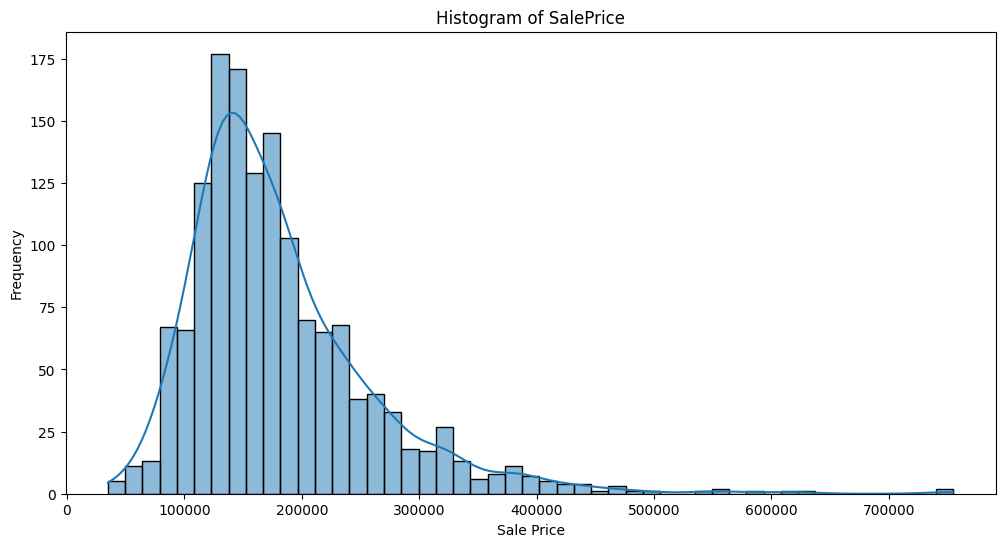

In [ ]:
# Histogram for SalePrice
plt.figure(figsize=(12,6))
sns.histplot(df['SalePrice'],kde=True)
plt.title('Histogram of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

In [ ]:
# drop outliers
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = y_train[(y_train < lower_bound) | (y_train > upper_bound)]

# Remove outliers from the dataset
y_train_cleaned = y_train.drop(outliers.index)
x_train_cleaned = x_train.drop(outliers.index)

<ipython-input-177-7c6e25f8d54f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=correlation_matrix.index, y=correlation_matrix, palette='coolwarm')
<ipython-input-177-7c6e25f8d54f>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=60, ha='right')  # Rotate x-axis labels


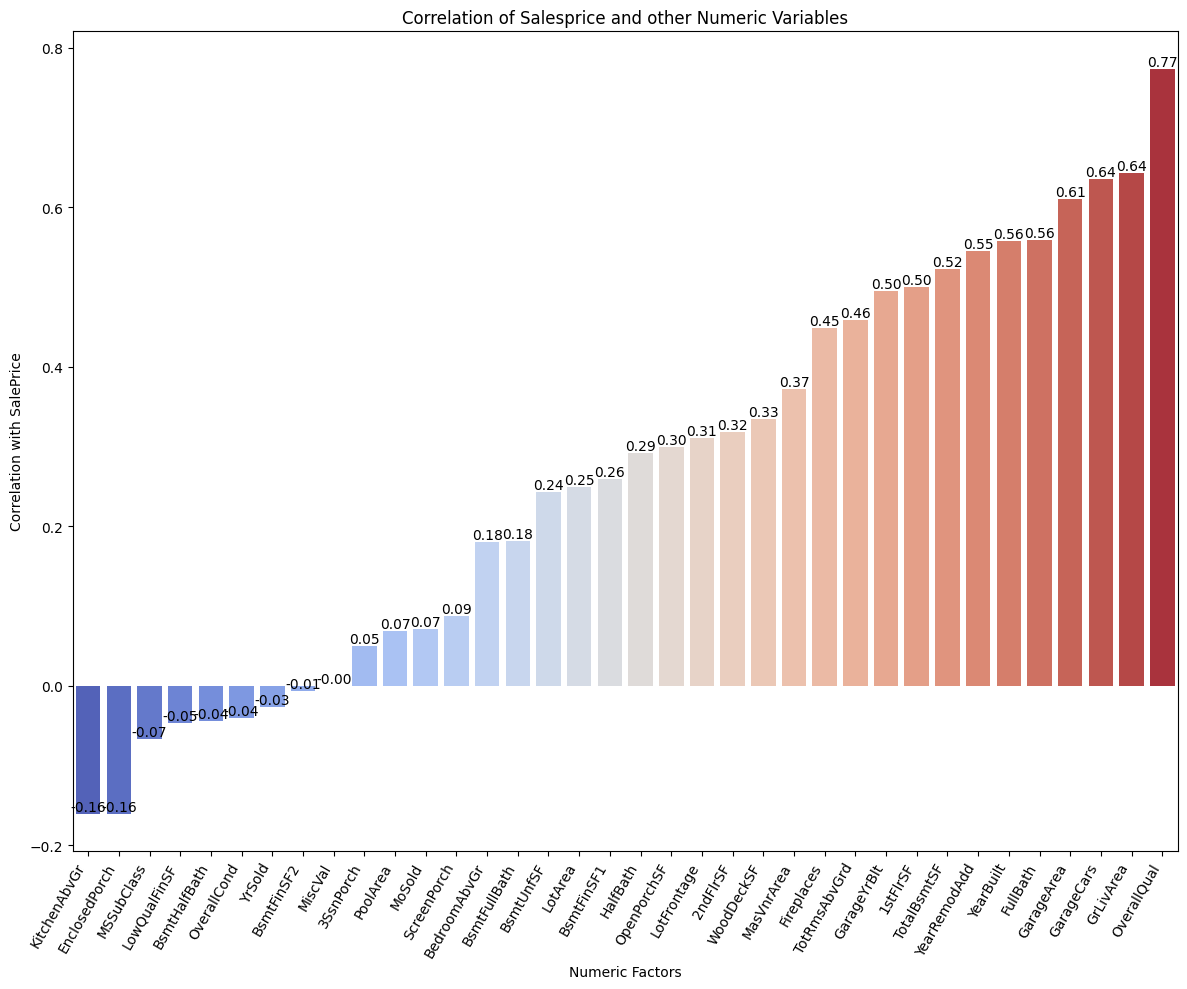

In [ ]:
#Create heat map of all numeric variables
# Select only numeric variables
x_train_numeric = x_train_cleaned.select_dtypes(include=['int64', 'float64']).drop(columns=['Id'])

# Calculate the correlation matrix
train_data = pd.concat([x_train_numeric, y_train_cleaned], axis=1)
correlation_matrix = train_data.corr()
correlation_matrix = correlation_matrix['SalePrice'].drop('SalePrice').sort_values()
correlation_matrix=correlation_matrix.sort_values()

# Plot barplot for correlation
plt.figure(figsize=(12, 10))
bar_plot = sns.barplot(x=correlation_matrix.index, y=correlation_matrix, palette='coolwarm')
plt.title('Correlation of Salesprice and other Numeric Variables')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=60, ha='right')  # Rotate x-axis labels
plt.xlabel('Numeric Factors')
plt.ylabel('Correlation with SalePrice')
for index, value in enumerate(correlation_matrix):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# I can see 13 variables has correlation greater than 0.5

In [ ]:
categorical_variables = x_train_cleaned.select_dtypes(include=['object']).columns.tolist()
categorical_variables

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

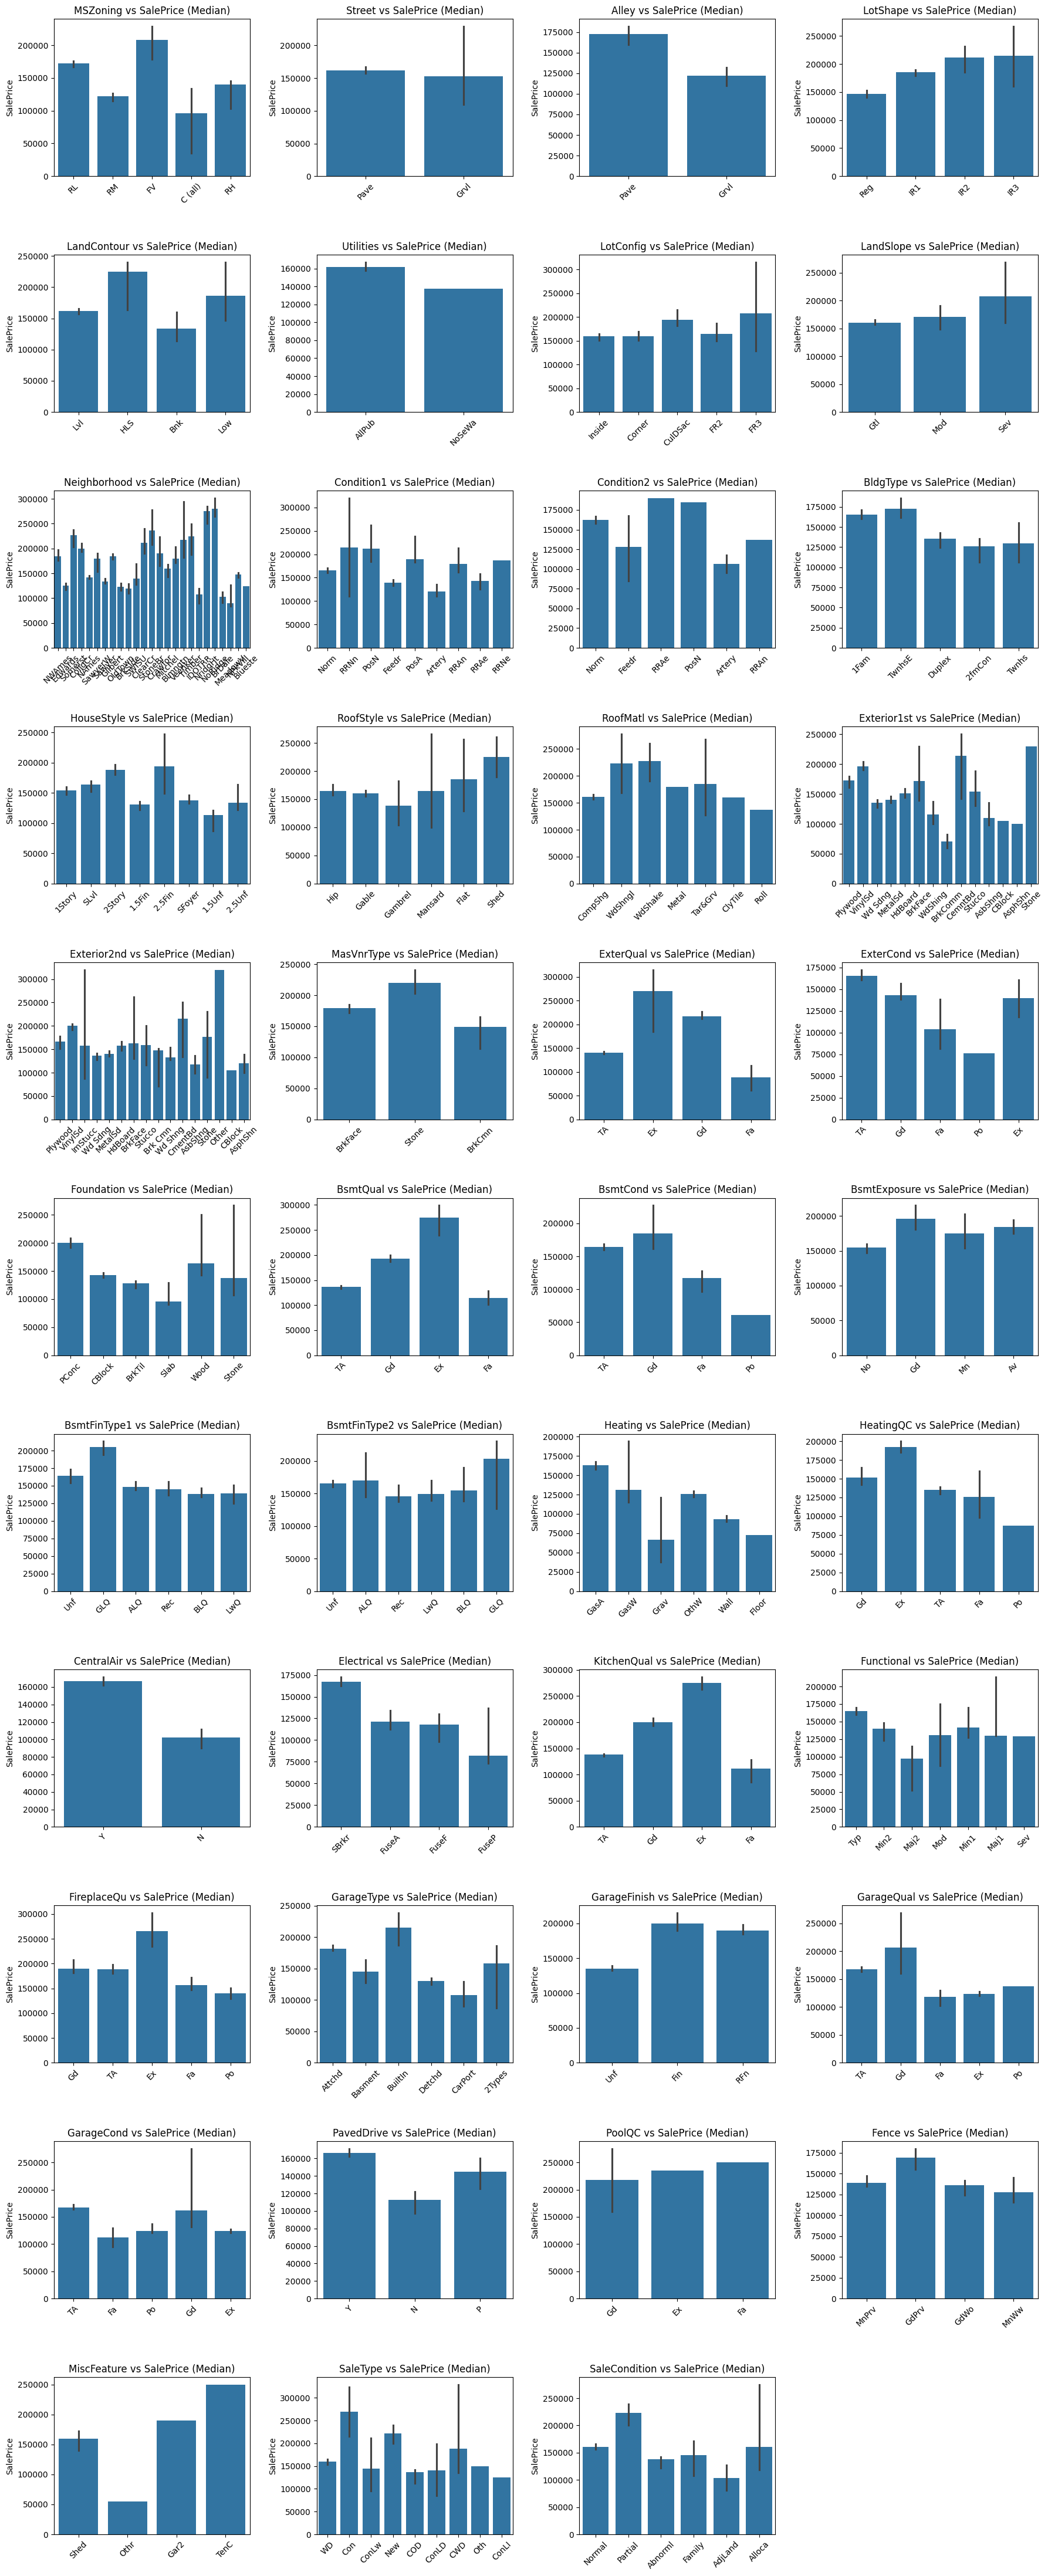

In [ ]:
# #This is designed to run once
# import numpy as np

# # Create subplots
# num_plots = len(categorical_variables)
# cols_per_row = 4
# rows = num_plots // cols_per_row + 1
# fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4*rows))

# for idx, col in enumerate(categorical_variables):
#     row_idx = idx // cols_per_row
#     col_idx = idx % cols_per_row
#     ax = axes[row_idx, col_idx]
#     sns.barplot(x=x_train_cleaned[col], y=y_train_cleaned, estimator=np.median, ax=ax)
#     ax.set_title(f'{col} vs SalePrice (Median)')
#     ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
#     ax.set_xlabel('')  # Remove x-axis label for better clarity
#     ax.set_ylabel('SalePrice')
#     plt.tight_layout()  # Adjust layout to prevent overlapping
#     plt.subplots_adjust(hspace=0.5)  # Add vertical spacing between subplots

# # Remove empty subplots if any
# if num_plots % cols_per_row != 0:
#     for i in range(cols_per_row - (num_plots % cols_per_row)):
#         fig.delaxes(axes[-1, -(i+1)])

# # I can see MSZoning 'FV', Pave street, Pave Alley, IR2 lot shape, HLS land contour, Allpub utility,
# # NoRidge/NridgHr/StroneBr Neighborhood, PosN/PosA Condition2, 1Fam/TwnhsE BldgType, 2stroy/SLvl HouseStyle,
# # WdShngl RoofMatl, Exterior CemntBd/Stone/Imstucc/VinylSd, EX BsmtQual, PConc Foundation, Gd BsmtCond, GLQ BsmtFinType1, GasA Heating, Y Central Air
# # SBrkr Electrical, Ex heatingQC, Ex KitchenQual, Ex FireplaceQu, Builtin GarageType, Gd GarageQual, Y PavedDrive, Ex PoolQC, Tenc MiscFeature, Con/New for SaleType
# # Partial SalesCondition

## **Feature Engineering**

In [ ]:
#Feature Engineering: Step 1 One Key Encoding Categorical Variable to boolean column
x_train_cleaned_encoded = pd.get_dummies(x_train_cleaned)
x_train_cleaned_encoded.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,136,20,80.0,10400,7,6,1970,1970,288.0,0,...,False,False,False,True,False,False,False,False,True,False
1452,1453,180,35.0,3675,5,5,2005,2005,80.0,547,...,False,False,False,True,False,False,False,False,True,False
762,763,60,72.0,8640,7,5,2009,2009,0.0,24,...,False,False,False,False,False,False,False,False,True,False
932,933,20,84.0,11670,9,5,2006,2006,302.0,0,...,False,False,False,True,False,False,False,False,True,False
435,436,60,43.0,10667,7,6,1996,1996,0.0,385,...,True,False,False,False,False,False,False,False,True,False


In [ ]:
#Feature Engineering: Step 2 Create Some Additional Variables
x_train_cleaned_encoded['Nonlivingarea']=x_train_cleaned_encoded['GarageArea']+x_train_cleaned_encoded['PoolArea']+x_train_cleaned_encoded['WoodDeckSF']
x_train_cleaned_encoded['QualityCondition']=x_train_cleaned_encoded['OverallQual']+x_train_cleaned_encoded['OverallCond']

#Feature Engineering: Step 3 Fill NaN with Median
x_train_cleaned_encoded = x_train_cleaned_encoded.fillna(x_train_cleaned_encoded.median())

## **Regression Model 1 with Min Max Scaling**

In [ ]:
# Create Linear Model with Min/Max Scaling of Independt Variable
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_cleaned_encoded) # fit it on the training data

# Assuming X_train_cleaned_encoded is a DataFrame and the linear regression model is already fitted

# Add a constant column to the independent variable dataset (required for statsmodels)
x_train_scaled_with_const = sm.add_constant(x_train_scaled)

# Fit the linear regression model using statsmodels
model1 = sm.OLS(y_train_cleaned, x_train_scaled_with_const).fit()

y_pred1 = model1.predict(x_train_scaled_with_const)

In [ ]:
#Performance Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mse = mean_squared_error(y_train_cleaned, y_pred1)
print("Mean Squared Error:", mse)


# Calculate the R^2 score
r2 = r2_score(y_train_cleaned, y_pred1)
print("R^2 Score:", r2)

Mean Squared Error: 190427348.26248127
R^2 Score: 0.9453845247988569


#**Regression Model 2 with Standard Scaling**

In [ ]:
# Create Linear Model with Standard Scaling of Independent Variable
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_cleaned_encoded) # fit it on the training data


# Assuming X_train_cleaned_encoded is a DataFrame and the linear regression model is already fitted

# Add a constant column to the independent variable dataset (required for statsmodels)
x_train_scaled_with_const = sm.add_constant(x_train_scaled)

# Fit the linear regression model using statsmodels
model2 = sm.OLS(y_train_cleaned, x_train_scaled_with_const).fit()

y_pred2 = model2.predict(x_train_scaled_with_const)

In [ ]:
#Performance Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mse = mean_squared_error(y_train_cleaned, y_pred2)
print("Mean Squared Error:", mse)


# Calculate the R^2 score
r2 = r2_score(y_train_cleaned, y_pred2)
print("R^2 Score:", r2)

Mean Squared Error: 190427348.26248115
R^2 Score: 0.9453845247988569


## **Standard Scaled Linear Regression Using Test Data**

In [ ]:
# Create Linear Model with Min/Max Scaling of Independentt Variable
from sklearn.preprocessing import StandardScaler

#One Key Encoding Categorical Variable to boolean column
x_test_cleaned_encoded = pd.get_dummies(x_test)

# Create Some Additional Variables
x_test_cleaned_encoded['Nonlivingarea']=x_test_cleaned_encoded['GarageArea']+x_test_cleaned_encoded['PoolArea']+x_test_cleaned_encoded['WoodDeckSF']
x_test_cleaned_encoded['QualityCondition']=x_test_cleaned_encoded['OverallQual']+x_test_cleaned_encoded['OverallCond']

# Fill NaN with Median
x_test_cleaned_encoded = x_test_cleaned_encoded.fillna(x_test_cleaned_encoded.median())


# Make sure missing dummy variables are added to test dataset and drop those not in trained dataset
missing_cols = set(x_test_cleaned_encoded.columns) - set(x_train_cleaned_encoded.columns)
x_test_cleaned_encoded=x_test_cleaned_encoded.drop(columns=missing_cols)

missing_cols = set(x_train_cleaned_encoded.columns)- set(x_test_cleaned_encoded.columns)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    x_test_cleaned_encoded[c] = False
# Ensure the order of column in the test set is in the same order than in train set
print(len(x_test_cleaned_encoded.columns))
print(len(x_train_cleaned_encoded.columns))

# Ensure that the columns order is the same in both datasets
train_columns = x_train_cleaned_encoded.columns

x_test_cleaned_encoded = x_test_cleaned_encoded[train_columns]

scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test_cleaned_encoded) # fit it on the training data

# predict using trained model
x_test_scaled = sm.add_constant(x_test_scaled)

y_pred = model2.predict(x_test_scaled)

<ipython-input-261-7ae9246bb8c7>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test_cleaned_encoded[c] = False
<ipython-input-261-7ae9246bb8c7>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test_cleaned_encoded[c] = False
<ipython-input-261-7ae9246bb8c7>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = 

285
285


In [ ]:
#Performance Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Mean Squared Error: 3532384093.1461596
# R^2 Score: 0.49378953419641747

Mean Squared Error: 1006609493.12079
R^2 Score: 0.8557472101112479


## **Make prediction of Kaggle Test Dataset**

In [ ]:
df=pd.read_csv('Housing_Price/test.csv')

In [ ]:
#One Key Encoding Categorical Variable to boolean column
df_encoded = pd.get_dummies(df)

# Create Some Additional Variables
df_encoded['Nonlivingarea']=df_encoded['GarageArea']+df_encoded['PoolArea']+df_encoded['WoodDeckSF']
df_encoded['QualityCondition']=df_encoded['OverallQual']+df_encoded['OverallCond']

# Fill NaN with Median
df_encoded = df_encoded.fillna(df_encoded.median())


# Make sure missing dummy variables are added to test dataset and drop those not in trained dataset
missing_cols = set(df_encoded.columns) - set(x_train_cleaned_encoded.columns)
df_encoded=df_encoded.drop(columns=missing_cols)

missing_cols = set(x_train_cleaned_encoded.columns)- set(df_encoded)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    df_encoded[c] = False
# Ensure the order of column in the test set is in the same order than in train set
print(len(df_encoded.columns))
print(len(x_train_cleaned_encoded.columns))

# Ensure that the columns order is the same in both datasets
train_columns = x_train_cleaned_encoded.columns

df_encoded = df_encoded[train_columns]

scaler = MinMaxScaler()
df_encoded_scaled = scaler.fit_transform(df_encoded) # fit it on the training data

# predict using trained model
df_encoded_scaled = sm.add_constant(df_encoded_scaled)

y_pred = model1.predict(df_encoded_scaled)

285
285


<ipython-input-23-27ce27a72f34>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[c] = False
<ipython-input-23-27ce27a72f34>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[c] = False
<ipython-input-23-27ce27a72f34>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[

In [ ]:
y_pred

array([138473.62940471, 211609.9394033 , 214017.29845965, ...,
       211870.45725206, 131382.86807886, 232281.34241112])

In [ ]:
result=pd.concat([df['Id'],pd.DataFrame(y_pred)],axis=1)
result.rename(columns={0:'SalePrice'},inplace=True)

In [ ]:
result.to_csv('Housing_Price/model1prediction.csv',index=False)

# OLS Model and Feature Selection Using P-Value

In [ ]:
import numpy as np

# View the summary of the model
#print(model2.summary())

# Extract the pvalues from the first model
model2_p_values = model2.pvalues
model2_p_values = model2_p_values[1:]

# Check to see how many have large pvalues
print(len(model2_p_values))
print(len(model2_p_values[model2_p_values > 0.05]))

# Remove columns with pvalue > 0.01
column_names = x_train_cleaned_encoded.columns
print(len(column_names))
x_train_remove_cols = x_train_cleaned_encoded.copy()
x_train_remove_cols.drop([col for (index, col) in enumerate(column_names) if model2_p_values[index] > 0.05],axis=1,inplace=True)
print(len(x_train_remove_cols.columns))

# StandardScaler
scaler = StandardScaler()
x_train_remove_cols_scaled = scaler.fit_transform(x_train_remove_cols) # fit it on the training data

# Add a constant column to the independent variable dataset (required for statsmodels)
x_train_remove_cols_scaled_with_const = np.asarray(sm.add_constant(x_train_remove_cols_scaled))

# Fit the linear regression model using statsmodels
model3 = sm.OLS(y_train_cleaned, x_train_remove_cols_scaled_with_const).fit()
y_pred3 = model3.predict(x_train_remove_cols_scaled_with_const)

285
207
285
78


In [ ]:
#Performance Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mse = mean_squared_error(y_train_cleaned, y_pred3)
print("Mean Squared Error:", mse)


# Calculate the R^2 score
r2 = r2_score(y_train_cleaned, y_pred3)
print("R^2 Score:", r2)

Mean Squared Error: 263234390.2897185
R^2 Score: 0.9245031165631754


In [ ]:
# Create Linear Model with Min/Max Scaling of Independentt Variable
from sklearn.preprocessing import MinMaxScaler

#One Key Encoding Categorical Variable to boolean column
x_test_cleaned_encoded = pd.get_dummies(x_test)

# Create Some Additional Variables
x_test_cleaned_encoded['Nonlivingarea']=x_test_cleaned_encoded['GarageArea']+x_test_cleaned_encoded['PoolArea']+x_test_cleaned_encoded['WoodDeckSF']
x_test_cleaned_encoded['QualityCondition']=x_test_cleaned_encoded['OverallQual']+x_test_cleaned_encoded['OverallCond']

# Fill NaN with Median
x_test_cleaned_encoded = x_test_cleaned_encoded.fillna(x_test_cleaned_encoded.median())


# Make sure missing dummy variables are added to test dataset and drop those not in trained dataset
missing_cols = set(x_test_cleaned_encoded.columns) - set(x_train_cleaned_encoded.columns)
x_test_cleaned_encoded=x_test_cleaned_encoded.drop(columns=missing_cols)

missing_cols = set(x_train_cleaned_encoded.columns)- set(x_test_cleaned_encoded.columns)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    x_test_cleaned_encoded[c] = True
# Ensure the order of column in the test set is in the same order than in train set
print(len(x_test_cleaned_encoded.columns))
print(len(x_train_cleaned_encoded.columns))

# Remove columns with pvalue > 0.01
x_test_remove_cols = x_test_cleaned_encoded.copy()
for col in x_test_remove_cols.columns:
  if col not in x_train_remove_cols.columns:
    x_test_remove_cols.drop(col, axis=1, inplace=True)

print(len(x_test_remove_cols.columns))
print(len(x_train_remove_cols.columns))

# Ensure that the columns order is the same in both datasets
train_columns = x_train_remove_cols.columns

x_test_remove_cols = x_test_remove_cols[train_columns]

scaler = StandardScaler()
x_test_standard_scaled = scaler.fit_transform(x_test_remove_cols) # fit it on the test data

# predict using trained model
x_test_standard_scaled = sm.add_constant(x_test_standard_scaled)

y_pred = model3.predict(x_test_standard_scaled)

<ipython-input-270-2ecff29127a5>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test_cleaned_encoded[c] = True
<ipython-input-270-2ecff29127a5>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test_cleaned_encoded[c] = True
<ipython-input-270-2ecff29127a5>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

285
285
78
78


In [ ]:
#Performance Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 994225725.938798
R^2 Score: 0.8575218734514443


In [ ]:
df=pd.read_csv('Housing_Price/test.csv')

In [ ]:
#One Key Encoding Categorical Variable to boolean column
df_encoded = pd.get_dummies(df)

# Create Some Additional Variables
df_encoded['Nonlivingarea']=df_encoded['GarageArea']+df_encoded['PoolArea']+df_encoded['WoodDeckSF']
df_encoded['QualityCondition']=df_encoded['OverallQual']+df_encoded['OverallCond']

# Fill NaN with Median
df_encoded = df_encoded.fillna(df_encoded.median())


# Make sure missing dummy variables are added to test dataset and drop those not in trained dataset
missing_cols = set(df_encoded.columns) - set(x_train_cleaned_encoded.columns)
df_encoded=df_encoded.drop(columns=missing_cols)

missing_cols = set(x_train_cleaned_encoded.columns)- set(df_encoded)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    df_encoded[c] = False
# Ensure the order of column in the test set is in the same order than in train set
print(len(df_encoded.columns))
print(len(x_train_cleaned_encoded.columns))

# Remove columns with pvalue > 0.05
df_remove_cols = df_encoded.copy()
for col in df_remove_cols.columns:
  if col not in x_train_remove_cols.columns:
    df_remove_cols.drop(col, axis=1, inplace=True)

# Ensure that the columns order is the same in both datasets
train_columns = x_train_remove_cols.columns

df_remove_cols = df_remove_cols[train_columns]

scaler = MinMaxScaler()
df_encoded_scaled = scaler.fit_transform(df_remove_cols) # fit it on the training data

# predict using trained model
df_encoded_scaled = sm.add_constant(df_encoded_scaled)

y_pred = model3.predict(df_encoded_scaled)

<ipython-input-268-11f2594417db>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[c] = False
<ipython-input-268-11f2594417db>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[c] = False
<ipython-input-268-11f2594417db>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encod

285
285


In [ ]:
df=pd.read_csv('Housing_Price/test.csv')
result=pd.concat([df['Id'],pd.DataFrame(y_pred)],axis=1)
result.rename(columns={0:'SalePrice'},inplace=True)
result.to_csv('Housing_Price/model3prediction.csv',index=False)

# OLS Model and Feature Selection Using P-Value (Standard Scaler)

In [ ]:
import numpy as np

# View the summary of the model
#print(model2.summary())

# Extract the pvalues from the first model
model1_p_values = model1.pvalues
model1_p_values = model1_p_values[1:]

# Check to see how many have large pvalues
print(len(model1_p_values))
print(len(model1_p_values[model1_p_values > 0.05]))

# Remove columns with pvalue > 0.05
column_names = x_train_cleaned_encoded.columns
print(len(column_names))
x_train_remove_cols = x_train_cleaned_encoded.copy()
x_train_remove_cols.drop([col for (index, col) in enumerate(column_names) if model1_p_values[index] > 0.05],axis=1,inplace=True)
print(len(x_train_remove_cols.columns))
print(x_train_remove_cols.columns)

# MinMaxScaler
scaler = StandardScaler()
x_train_remove_cols_scaled = scaler.fit_transform(x_train_remove_cols) # fit it on the training data

# Add a constant column to the independent variable dataset (required for statsmodels)
x_train_remove_cols_scaled_with_const = np.asarray(sm.add_constant(x_train_remove_cols_scaled))

# Fit the linear regression model using statsmodels
model4 = sm.OLS(y_train_cleaned, x_train_remove_cols_scaled_with_const).fit()
y_pred4 = model4.predict(x_train_remove_cols_scaled_with_const)

285
188
285
97
Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'KitchenAbvGr', 'OpenPorchSF', 'PoolArea', 'MiscVal',
       'MSZoning_C (all)', 'Street_Grvl', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_Reg', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_NoSeWa', 'LotConfig_FR2', 'LandSlope_Sev',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'Condition1_Artery',
       'Condition1_RRAe', 'Condition2_Artery', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosN', 'Condition2_RRAe',
       'Condition2_RRAn', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Shed',
       'RoofMatl_ClyTi

In [ ]:
#Performance Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mse = mean_squared_error(y_train_cleaned, y_pred4)
print("Mean Squared Error:", mse)


# Calculate the R^2 score
r2 = r2_score(y_train_cleaned, y_pred4)
print("R^2 Score:", r2)

Mean Squared Error: 258052986.024472
R^2 Score: 0.9259891681137417


In [ ]:
# Create Linear Model with Min/Max Scaling of Independentt Variable
from sklearn.preprocessing import MinMaxScaler

#One Key Encoding Categorical Variable to boolean column
x_test_cleaned_encoded = pd.get_dummies(x_test)

# Create Some Additional Variables
x_test_cleaned_encoded['Nonlivingarea']=x_test_cleaned_encoded['GarageArea']+x_test_cleaned_encoded['PoolArea']+x_test_cleaned_encoded['WoodDeckSF']
x_test_cleaned_encoded['QualityCondition']=x_test_cleaned_encoded['OverallQual']+x_test_cleaned_encoded['OverallCond']

# Fill NaN with Median
x_test_cleaned_encoded = x_test_cleaned_encoded.fillna(x_test_cleaned_encoded.median())


# Make sure missing dummy variables are added to test dataset and drop those not in trained dataset
missing_cols = set(x_test_cleaned_encoded.columns) - set(x_train_cleaned_encoded.columns)
x_test_cleaned_encoded=x_test_cleaned_encoded.drop(columns=missing_cols)

missing_cols = set(x_train_cleaned_encoded.columns)- set(x_test_cleaned_encoded.columns)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    x_test_cleaned_encoded[c] = True
# Ensure the order of column in the test set is in the same order than in train set
print(len(x_test_cleaned_encoded.columns))
print(len(x_train_cleaned_encoded.columns))

# Remove columns with pvalue > 0.01
x_test_remove_cols = x_test_cleaned_encoded.copy()
for col in x_test_remove_cols.columns:
  if col not in x_train_remove_cols.columns:
    x_test_remove_cols.drop(col, axis=1, inplace=True)

print(len(x_test_remove_cols.columns))
print(len(x_train_remove_cols.columns))

# Ensure that the columns order is the same in both datasets
train_columns = x_train_remove_cols.columns

x_test_remove_cols = x_test_remove_cols[train_columns]

scaler = StandardScaler()
x_test_standard_scaled = scaler.fit_transform(x_test_remove_cols) # fit it on the test data

# predict using trained model
x_test_standard_scaled = sm.add_constant(x_test_standard_scaled)

y_pred = model4.predict(x_test_standard_scaled)

285
285
97
97


<ipython-input-237-5773677fa29f>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test_cleaned_encoded[c] = True
<ipython-input-237-5773677fa29f>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test_cleaned_encoded[c] = True
<ipython-input-237-5773677fa29f>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

In [ ]:
#Performance Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 980167044.3978319
R^2 Score: 0.8595365614196199


In [ ]:
df=pd.read_csv('Housing_Price/test.csv')

In [ ]:
#One Key Encoding Categorical Variable to boolean column
df_encoded = pd.get_dummies(df)

# Create Some Additional Variables
df_encoded['Nonlivingarea']=df_encoded['GarageArea']+df_encoded['PoolArea']+df_encoded['WoodDeckSF']
df_encoded['QualityCondition']=df_encoded['OverallQual']+df_encoded['OverallCond']

# Fill NaN with Median
df_encoded = df_encoded.fillna(df_encoded.median())


# Make sure missing dummy variables are added to test dataset and drop those not in trained dataset
missing_cols = set(df_encoded.columns) - set(x_train_cleaned_encoded.columns)
df_encoded=df_encoded.drop(columns=missing_cols)

missing_cols = set(x_train_cleaned_encoded.columns)- set(df_encoded)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    df_encoded[c] = False
# Ensure the order of column in the test set is in the same order than in train set
print(len(df_encoded.columns))
print(len(x_train_cleaned_encoded.columns))

# Remove columns with pvalue > 0.05
df_remove_cols = df_encoded.copy()
for col in df_remove_cols.columns:
  if col not in x_train_remove_cols.columns:
    df_remove_cols.drop(col, axis=1, inplace=True)

# Ensure that the columns order is the same in both datasets
train_columns = x_train_remove_cols.columns

df_remove_cols = df_remove_cols[train_columns]

scaler = MinMaxScaler()
df_encoded_scaled = scaler.fit_transform(df_remove_cols) # fit it on the training data

# predict using trained model
df_encoded_scaled = sm.add_constant(df_encoded_scaled)

y_pred = model4.predict(df_encoded_scaled)

<ipython-input-233-b74d9e217885>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[c] = False
<ipython-input-233-b74d9e217885>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[c] = False
<ipython-input-233-b74d9e217885>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encod

285
285


In [ ]:
df=pd.read_csv('Housing_Price/test.csv')
result=pd.concat([df['Id'],pd.DataFrame(y_pred)],axis=1)
result.rename(columns={0:'SalePrice'},inplace=True)
result.to_csv('Housing_Price/model4prediction.csv',index=False)

# Test

In [ ]:
high_corr_cols = ['Nonlivingarea', 'QualityCondition', 'GarageYrBIt', 'IstFIrSF', 'TotalBsmtSF', 'YearRemodAdd', 'YearBuilt', 'FullBath', 'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual']

# Remove columns not with high correlation
x_train_remove_corr_cols = x_train_cleaned_encoded.copy()
for col in x_train_remove_corr_cols.columns:
  if col not in high_corr_cols:
    x_train_remove_corr_cols.drop(col, axis=1, inplace=True)

# MinMaxScaler
scaler = StandardScaler()
x_train_remove_corr_cols_scaled = scaler.fit_transform(x_train_remove_corr_cols) # fit it on the training data

# Add a constant column to the independent variable dataset (required for statsmodels)
x_train_remove_corr_cols_with_const = np.asarray(sm.add_constant(x_train_remove_corr_cols_scaled))

# Fit the linear regression model using statsmodels
model5 = sm.OLS(y_train_cleaned, x_train_remove_corr_cols_with_const).fit()
y_pred5 = model5.predict(x_train_remove_corr_cols_with_const)


In [ ]:
#Performance Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mse = mean_squared_error(y_train_cleaned, y_pred5)
print("Mean Squared Error:", mse)


# Calculate the R^2 score
r2 = r2_score(y_train_cleaned, y_pred5)
print("R^2 Score:", r2)

Mean Squared Error: 806732806.2498327
R^2 Score: 0.7686251687286284


In [ ]:
# Create Linear Model with Min/Max Scaling of Independentt Variable
from sklearn.preprocessing import MinMaxScaler

#One Key Encoding Categorical Variable to boolean column
x_test_cleaned_encoded = pd.get_dummies(x_test)

# Create Some Additional Variables
x_test_cleaned_encoded['Nonlivingarea']=x_test_cleaned_encoded['GarageArea']+x_test_cleaned_encoded['PoolArea']+x_test_cleaned_encoded['WoodDeckSF']
x_test_cleaned_encoded['QualityCondition']=x_test_cleaned_encoded['OverallQual']+x_test_cleaned_encoded['OverallCond']

# Fill NaN with Median
x_test_cleaned_encoded = x_test_cleaned_encoded.fillna(x_test_cleaned_encoded.median())


# Make sure missing dummy variables are added to test dataset and drop those not in trained dataset
missing_cols = set(x_test_cleaned_encoded.columns) - set(x_train_cleaned_encoded.columns)
x_test_cleaned_encoded=x_test_cleaned_encoded.drop(columns=missing_cols)

missing_cols = set(x_train_cleaned_encoded.columns)- set(x_test_cleaned_encoded.columns)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    x_test_cleaned_encoded[c] = True
# Ensure the order of column in the test set is in the same order than in train set
print(len(x_test_cleaned_encoded.columns))
print(len(x_train_cleaned_encoded.columns))

# Remove columns
x_test_remove_corr_cols = x_test_cleaned_encoded.copy()
for col in x_test_remove_corr_cols.columns:
  if col not in high_corr_cols:
    x_test_remove_corr_cols.drop(col, axis=1, inplace=True)

# Ensure that the columns order is the same in both datasets
train_columns = x_train_remove_corr_cols.columns

x_test_remove_corr_cols = x_test_remove_corr_cols[train_columns]

scaler = StandardScaler()
x_test_corr_standard_scaled = scaler.fit_transform(x_test_remove_corr_cols) # fit it on the test data

# predict using trained model
x_test_corr_standard_scaled = sm.add_constant(x_test_corr_standard_scaled)

y_pred = model5.predict(x_test_corr_standard_scaled)

<ipython-input-249-31f2c67ab93a>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test_cleaned_encoded[c] = True
<ipython-input-249-31f2c67ab93a>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test_cleaned_encoded[c] = True
<ipython-input-249-31f2c67ab93a>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

285
285


In [ ]:
#Performance Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 1888609796.934213
R^2 Score: 0.7293516164104978


In [ ]:
df=pd.read_csv('Housing_Price/test.csv')

In [ ]:
#One Key Encoding Categorical Variable to boolean column
df_encoded = pd.get_dummies(df)

# Create Some Additional Variables
df_encoded['Nonlivingarea']=df_encoded['GarageArea']+df_encoded['PoolArea']+df_encoded['WoodDeckSF']
df_encoded['QualityCondition']=df_encoded['OverallQual']+df_encoded['OverallCond']

# Fill NaN with Median
df_encoded = df_encoded.fillna(df_encoded.median())


# Make sure missing dummy variables are added to test dataset and drop those not in trained dataset
missing_cols = set(df_encoded.columns) - set(x_train_cleaned_encoded.columns)
df_encoded=df_encoded.drop(columns=missing_cols)

missing_cols = set(x_train_cleaned_encoded.columns)- set(df_encoded)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    df_encoded[c] = False
# Ensure the order of column in the test set is in the same order than in train set
print(len(df_encoded.columns))
print(len(x_train_cleaned_encoded.columns))

# Remove columns with pvalue > 0.05
df_remove_cols = df_encoded.copy()
for col in df_remove_cols.columns:
  if col not in high_corr_cols:
    df_remove_cols.drop(col, axis=1, inplace=True)

# Ensure that the columns order is the same in both datasets
train_columns = x_train_remove_corr_cols.columns

df_remove_cols = df_remove_cols[train_columns]

scaler = MinMaxScaler()
df_encoded_scaled = scaler.fit_transform(df_remove_cols) # fit it on the training data

# predict using trained model
df_encoded_scaled = sm.add_constant(df_encoded_scaled)

y_pred = model5.predict(df_encoded_scaled)

<ipython-input-252-11e3513e37a8>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[c] = False
<ipython-input-252-11e3513e37a8>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[c] = False
<ipython-input-252-11e3513e37a8>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encod

285
285


In [ ]:
df=pd.read_csv('Housing_Price/test.csv')
result=pd.concat([df['Id'],pd.DataFrame(y_pred)],axis=1)
result.rename(columns={0:'SalePrice'},inplace=True)
result.to_csv('Housing_Price/model5prediction.csv',index=False)